# **Laboratorio N°5: Número de Condición**


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cond

## Ejercicio 1

En este ejercicio vamos a probar o refutar algunas propiedades sobre el numero de condicion.
En cada item tendremos un propiedad que puede ser verdadera o falsa.
 - En caso de ser verdadera: dar su demostracion.
 - En caso de ser falsa: utilizar numpy para dar un contraejemplo.

Utilizar el comando `np.linalg.cond`.

**(a)** $Cond_2(A)$ + $Cond_2(B)$ = $Cond_2(A+B)$

In [11]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print(cond(A, 2) + cond(B, 2) == cond(A + B, 2))

False


**(b)** $Cond_1(A)$ - $Cond_1(B)$ = $Cond_2(A-B)$

In [12]:
print(cond(A, 1) - cond(B, 1) == cond(A - B, 2))


False


**(c)** $Cond_2(A)$ * $Cond_2(B)$ = $Cond_2(A.B)$

In [14]:
print(cond(A, 2) * cond(B, 2) == cond(A @ B, 2))

False


## Ejercicio 2

El objetivo de este ejercicio es estudiar el número de condición de
algunas matrices a medida que su tamaño aumenta.



**(a)** Programar funciones que, dado $n \in \mathbb{N}$, devuelvan las siguientes matrices de $\mathbb{R}^{n\times n}$. La función que define $B_n$ ya viene dada.


\begin{equation*}
A_n=
\begin{pmatrix}
\frac{1}{n} & 0 & 0 & \cdots  & n^2\\
0 & \frac{1}{n} & 0 & \cdots & 0 \\
0 & 0 & \frac{1}{n} & \cdots & 0\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
1 & 0 & 0 & \cdots &  \frac{1}{n}\\
\end{pmatrix}
\qquad
B_n=
\begin{pmatrix}
4 & 1 & 0 & \cdots & 0 & 0\\
1 & 4 & 1 & \cdots & 0 & 0 \\
0 & 1 & 4 & \ddots &  & \vdots\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 &  & \ddots & 4 & 1\\
0 & 0 & \cdots & \cdots & 1 & 4 \\
\end{pmatrix}
\qquad
H_n=
\begin{pmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \cdots  & \frac{1}{n}\\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{n+1} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{n+2}\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
\frac{1}{n} & \frac{1}{n+1} & \frac{1}{n+2} & \cdots &  \frac{1}{2n-1}\\
\end{pmatrix}
\end{equation*}



**Sugerencia:** Utilizar la función `np.diag` que recibe un array de números y genera una matriz diagonal con elementos dados por el array.




In [57]:
def matriz_B(n):
  B = np.eye(n, k=-1) + 4*np.eye(n, k=0) + np.eye(n, k=1)
  return B

def matriz_A(n):
  A = np.diag(np.repeat(np.divide(1,n), n))
  A[0][n-1] = np.square(n)
  A[n-1][0] = 1
  return A

def matriz_h_ez(n):
  res = np.zeros((n,n))
  for current_start_denominator in range(1,n+1):
    row = 1 / np.arange(current_start_denominator, n+current_start_denominator)
    res[current_start_denominator-1] = row

  return res

def matriz_h(n):
  # las pongo como columna
  rows = np.arange(1, n+1).reshape(n,-1)
  cols = np.arange(1, n+1)
  denominators = rows + cols - 1
  return 1 / denominators



**(b)** Graficar para 100 vectores **unitarios** (en norma 2), $v\in\mathbb{R^2}$, $\; A_2v,\ B_2v,\ H_2v$

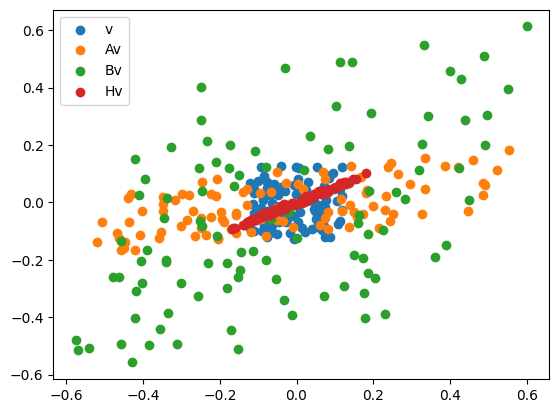

In [62]:
A = matriz_A(2)
B = matriz_B(2)
H = matriz_h(2)

V = np.random.rand(2, 100) - 0.5

# Divido por su norma2 para que sean unitarios
V = V / (np.linalg.norm(V))
# me aseguro de que sean de norma 1
assert np.allclose(np.linalg.norm(V), np.ones(len(V)))

AV = A @ V
BV = B @ V
HV = H @ V

plt.scatter(V[0], V[1], label = "v")
plt.scatter(AV[0], AV[1], label= "Av")
plt.scatter(BV[0], BV[1], label = "Bv")
plt.scatter(HV[0], HV[1], label = "Hv")
plt.legend()


**(c)** Programar una función que, dada una matriz $M_n$ y un número natural $N$, guarde en un vector el valor de $Cond_2(M_n)$ para $1\leq n \leq N$.

In [64]:
def vector_condicion(M: callable, N: int):
  return np.array([cond(M(n), 2) for n in range(1, N + 1)])


**(d)** Realizar gráficos del número de condición en norma 2 de las matrices definidas arriba para $N=10$.


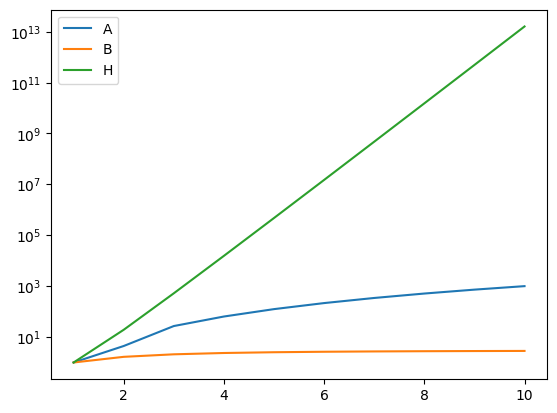

In [67]:
conds_A = vector_condicion(matriz_A, 10)
conds_B = vector_condicion(matriz_B, 10)
conds_H = vector_condicion(matriz_h, 10)

x = np.arange(1, 11)
y_A = conds_A
y_B = conds_B
y_H = conds_H

plt.plot(x, y_A, label="A")
plt.plot(x, y_B, label="B")
plt.plot(x, y_H, label="H")
plt.yscale('log')
plt.legend()
plt.show()

**Sugerencia:** Si es necesario, utilizar una escala logarítmica en el eje $y$.

**(e)** Repetir el ítem (d) para la matriz de Hilbert con $N=50$. ¿Cómo se explica el comportamiento observado?

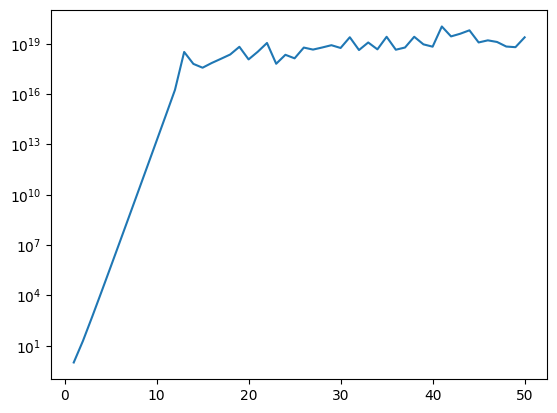

In [68]:
conds = vector_condicion(matriz_h, 50)
x = np.arange(1, 51)
y = conds
plt.plot(x, y)
plt.yscale('log')
plt.show()

Esto sucede porque los valores son muy grandes. Ademas, el calculo de la inversa de la matriz puede resultar erroneo al ser matrices tan grandes y con valores tan pequeños.

## Ejercicio 3 (Ej 20 - Práctica 2)

Sea
$A=\left(
\begin{array}{ccc}
3&0 & 0\\
0& \frac 54 & \frac 34\\
0& \frac 34 & \frac 54\\
\end{array}
\right).$



In [69]:
A = np.array([[3.0, 0, 0], [0, 5/4, 3/4], [0, 3/4, 5/4]])

(a) Calcular $Cond_\infty(A)$.


In [71]:
#COMPLETAR
print(cond(A, np.inf))

6.0


(b) ¿Cuán chico debe ser el error relativo en los datos, $\frac{\|b-\tilde{b}\|}{\|b\|}$, si se desea que el error relativo en la aproximación de la solución, $\frac{\|x-\tilde{x}\|}{\|x\|}, $ sea menor que $10^{-4}$ (en $\|\cdot\|_{\infty}$)?



Sé por propiedad que:
 
 $$\frac{\|x-\tilde{x}\|}{\|x\|} \leq \frac{\|b-\tilde{b}\|}{\|b\|} \cdot Cond_{\infty}(A)$$

Tomando $Cond_{\infty}(A) = 6$, que es el resultado obtenido, vemos que

$$\frac{\|x-\tilde{x}\|}{\|x\|} \leq \frac{\|b-\tilde{b}\|}{\|b\|} \cdot 6 \lt 10^{-4}$$

Finalmente

$$\frac{\|x-\tilde{x}\|}{\|x\|} \leq \frac{\|b-\tilde{b}\|}{\|b\|} \lt \frac{1}{6} \cdot 10^{-4}$$

(c) Realizar experimentos numéricos para verificar las estimaciones del ítem anterior. Considerar $b=(3,2,2)^t$, que se corresponde con la solución exacta $x=(1,1,1)^t$. Generar vectores de error aleatorios, normalizarlos para que su norma sea tan chica como la estimada en el item anterior y perturbar $b$ obteniendo $\tilde{b}$. Finalmente, resolver $A\tilde{x}=\tilde{b}$ y verificar que $\|\tilde{x}-x\|<10^{-4}$.

In [84]:
#COMPLETAR
b = np.array([3, 2, 2]).reshape(3, 1)
x = np.array([1, 1, 1]).reshape(3, 1)
error_relativo = 1e-4

vectores_error = np.random.rand(3, 100) - 0.5 # para centrarlos en 0

# normalizarlos para que su norma sea 10^-4
vectores_error = vectores_error / np.linalg.norm(vectores_error, np.inf) * 1e-4

for vector_error in vectores_error:
  b_perturbado = b + vector_error
  x_perturbado = np.linalg.solve(A, b_perturbado)
  error_relativo_x = np.linalg.norm(x_perturbado - x, np.inf) / np.linalg.norm(x, np.inf)
  assert error_relativo_x < error_relativo
